##Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
# Load the data
data=pd.read_csv('/content/drive/MyDrive/MLL_FINAL_PROJECT/sentiment_Analysis_Dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  19954 non-null  object 
 1   cleaned_text          19972 non-null  object 
 2   language              19996 non-null  object 
 3   retweet_count         19999 non-null  float64
 4   like_count            19999 non-null  float64
 5   reply_count           20000 non-null  int64  
 6   quote_count           19999 non-null  float64
 7   impression_count      20000 non-null  int64  
 8   is_reply              19998 non-null  object 
 9   user_following_count  19998 non-null  float64
 10  user_verified         19998 non-null  object 
 11  sentiment             19986 non-null  object 
 12  sentiment_score       20000 non-null  float64
 13  subjectivity          20000 non-null  float64
 14  emotion               19999 non-null  object 
 15  attack_type        

In [ ]:
data.head()

,text,cleaned_text,language,retweet_count,like_count,reply_count,quote_count,impression_count,is_reply,user_following_count,user_verified,sentiment,sentiment_score,subjectivity,emotion,attack_type,delivery_method,context_target
0,Yet away official defense floor minute want ri...,Yet away official defense floor minute want ri...,en,3.0,6.0,1,1.0,48,True,1331.0,False,neutral,0.000,0.750,joy,NaN,unknown,NaN
1,Credential stuffing attack successful. #Hackin...,Credential stuffing attack successful.,en,3.0,5.0,0,1.0,55,False,1213.0,True,positive,0.750,0.950,surprise,Ransomware,malware,email_system
2,Rather half anyone same foreign prepare messag...,Rather half anyone same foreign prepare messag...,es,1.0,5.0,0,1.0,52,False,1353.0,False,neutral,-0.097,0.139,surprise,NaN,unknown,NaN
3,Love the new MFA system. Toward during officia...,Love the new MFA system. Toward during officia...,en,3.0,8.0,0,3.0,45,False,1016.0,False,positive,0.212,0.518,sadness,Supply Chain,exploit,cloud_storage
4,Monitoring for potential Phishing. Huge break ...,NaN,en,4.0,7.0,1,0.0,51,False,1228.0,False,positive,0.200,0.950,neutral,Phishing,social_engineering,cloud_storage


In [ ]:
data.describe()

,retweet_count,like_count,reply_count,quote_count,impression_count,user_following_count,sentiment_score,subjectivity
count,19999.000000,19999.000000,20000.000000,19999.000000,20000.000000,19998.000000,20000.000000,20000.000000
mean,3.001250,8.019051,1.002800,0.990850,50.001450,1032.492699,0.127148,0.385902
std,1.722656,2.836881,1.002618,0.995271,7.101244,562.781456,0.261338,0.293996
min,0.000000,0.000000,0.000000,0.000000,23.000000,50.000000,-0.800000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,45.000000,545.000000,0.000000,0.100000
50%,3.000000,8.000000,1.000000,1.000000,50.000000,1038.000000,0.033000,0.400000
75%,4.000000,10.000000,2.000000,2.000000,55.000000,1522.750000,0.217000,0.557000
max,13.000000,26.000000,7.000000,7.000000,79.000000,1999.000000,1.000000,1.000000


 Identify Column Data Types



In [ ]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
num_col = [col for col in data.columns if data[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['text', 'cleaned_text', 'language', 'is_reply', 'user_verified', 'sentiment', 'emotion', 'attack_type', 'delivery_method', 'context_target']
Numerical columns: ['retweet_count', 'like_count', 'reply_count', 'quote_count', 'impression_count', 'user_following_count', 'sentiment_score', 'subjectivity']


Count Unique Values in the Categorical Columns

In [ ]:
data[cat_col].nunique()

,0
text,19826
cleaned_text,16248
language,3
is_reply,2
user_verified,2
sentiment,3
emotion,6
attack_type,12
delivery_method,5
context_target,9


Summary Statistics for Numerical Data

In [ ]:
numerical_cols = ['retweet_count', 'like_count', 'impression_count',
                  'sentiment_score', 'subjectivity']
print("Summary Statistics for Numerical Variables:")
print(data[numerical_cols].describe().T.to_markdown(floatfmt=".2f"))

Summary Statistics for Numerical Variables:
|                  |    count |   mean |   std |   min |   25% |   50% |   75% |   max |
|:-----------------|---------:|-------:|------:|------:|------:|------:|------:|------:|
| retweet_count    | 19999.00 |   3.00 |  1.72 |  0.00 |  2.00 |  3.00 |  4.00 | 13.00 |
| like_count       | 19999.00 |   8.02 |  2.84 |  0.00 |  6.00 |  8.00 | 10.00 | 26.00 |
| impression_count | 20000.00 |  50.00 |  7.10 | 23.00 | 45.00 | 50.00 | 55.00 | 79.00 |
| sentiment_score  | 20000.00 |   0.13 |  0.26 | -0.80 |  0.00 |  0.03 |  0.22 |  1.00 |
| subjectivity     | 20000.00 |   0.39 |  0.29 |  0.00 |  0.10 |  0.40 |  0.56 |  1.00 |


##Exploring Dataset


In [ ]:
print(data['sentiment'].unique())

['neutral' 'positive' nan 'negative']


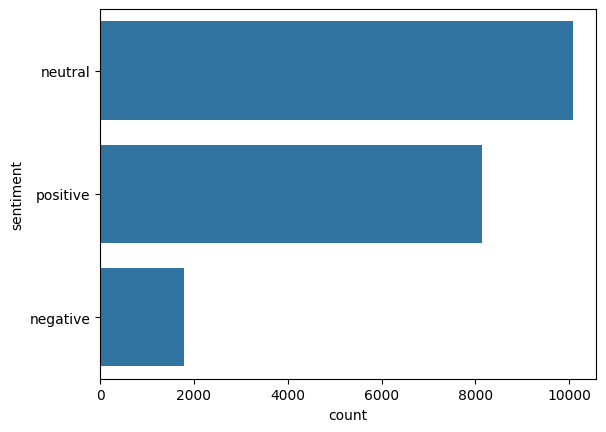

In [ ]:
sns.countplot(data['sentiment'], label = "Count")
plt.show()

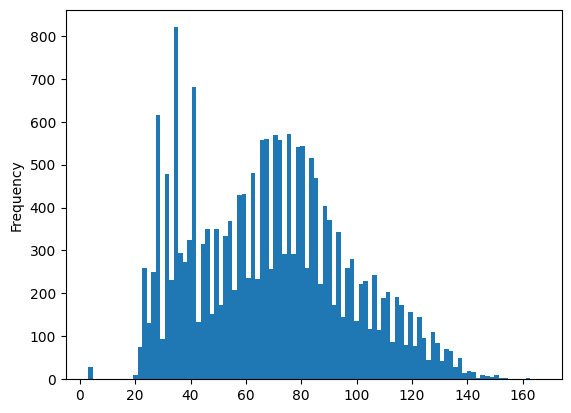

In [ ]:
data['length'] = data['cleaned_text'].astype(str).apply(len)
data['length'].plot(bins=100, kind='hist')
plt.show()

In [ ]:
# Let's see the shortest message
data[data['length'] == data['length'].min()]['cleaned_text'].iloc[0]

nan

In [ ]:
# Let's see the message with length closest to the specified value
target_length = 84
closest_length_idx = (data['length'] - target_length).abs().idxmin()
closest_message = data.loc[closest_length_idx, 'cleaned_text']
print(f"Message with length closest to {target_length}:\n{closest_message}")
print(f"Actual length: {data.loc[closest_length_idx, 'length']}")

Message with length closest to 84:
Cup say would leader front time anyone last stock these start early section brother.
Actual length: 84


##Implementation for Data Cleaning

In [ ]:
data.isnull().sum()

,0
text,46
cleaned_text,28
language,4
retweet_count,1
like_count,1
reply_count,0
quote_count,1
impression_count,0
is_reply,2
user_following_count,2


In [ ]:
data = data.dropna(subset=['cleaned_text','sentiment']).reset_index(drop=True)
data.shape

(19958, 19)

Check for Duplicate Rows

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19953,False
19954,False
19955,False
19956,False


In [ ]:
data = data.drop_duplicates(subset=['cleaned_text']).reset_index(drop=True)
data.shape

(16235, 19)

In [ ]:
data['char_len'] = data['cleaned_text'].str.len()
data['word_len'] = data['cleaned_text'].apply(lambda x: len(str(x).split()))
data[['cleaned_text','char_len','word_len']].head()

,cleaned_text,char_len,word_len
0,Yet away official defense floor minute want ri...,106,16
1,Credential stuffing attack successful.,38,4
2,Rather half anyone same foreign prepare messag...,53,8
3,Love the new MFA system. Toward during officia...,62,10
4,Be question pay camera authority analysis nigh...,106,16


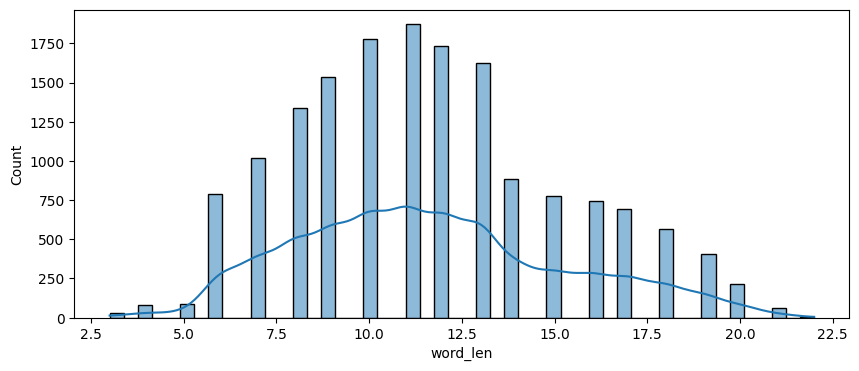

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data['word_len'], bins=50, kde=True)
plt.show()

Step 5: Calculate Missing Values as Percentage

In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2)

,0
text,0.23
cleaned_text,0.00
language,0.02
retweet_count,0.00
like_count,0.01
reply_count,0.00
quote_count,0.01
impression_count,0.00
is_reply,0.01
user_following_count,0.01


Step 6: Drop Irrelevant or Data-Heavy Missing Columns

In [ ]:

df_cleaned = data.copy()

df_cleaned.dropna(subset=['cleaned_text'], inplace=True)

# 3. Fill missing numeric values with mean
num_cols_to_fill = [
    'retweet_count', 'like_count', 'reply_count',
    'quote_count', 'impression_count',
    'user_following_count', # 'user_followers_count' is not in the DataFrame
    'sentiment_score'
]

for col in num_cols_to_fill:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# 4. Fill missing categorical values with mode
cat_cols_to_fill = ['language', 'sentiment', 'emotion', 'delivery_method']
# 'attack_type' was already dropped.

for col in cat_cols_to_fill:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

df_cleaned.head()

,text,cleaned_text,language,retweet_count,like_count,reply_count,quote_count,impression_count,is_reply,user_following_count,...,sentiment,sentiment_score,subjectivity,emotion,attack_type,delivery_method,context_target,length,char_len,word_len
0,Yet away official defense floor minute want ri...,Yet away official defense floor minute want ri...,en,3.0,6.0,1,1.0,48,True,1331.0,...,neutral,0.000,0.750,joy,NaN,unknown,NaN,106,106,16
1,Credential stuffing attack successful. #Hackin...,Credential stuffing attack successful.,en,3.0,5.0,0,1.0,55,False,1213.0,...,positive,0.750,0.950,surprise,Ransomware,malware,email_system,38,38,4
2,Rather half anyone same foreign prepare messag...,Rather half anyone same foreign prepare messag...,es,1.0,5.0,0,1.0,52,False,1353.0,...,neutral,-0.097,0.139,surprise,NaN,unknown,NaN,53,53,8
3,Love the new MFA system. Toward during officia...,Love the new MFA system. Toward during officia...,en,3.0,8.0,0,3.0,45,False,1016.0,...,positive,0.212,0.518,sadness,Supply Chain,exploit,cloud_storage,62,62,10
4,Be question pay camera authority analysis nigh...,Be question pay camera authority analysis nigh...,en,5.0,11.0,0,2.0,39,NaN,176.0,...,positive,0.500,0.500,joy,NaN,unknown,NaN,106,106,16


Step 7: Detect Outliers with Box Plot

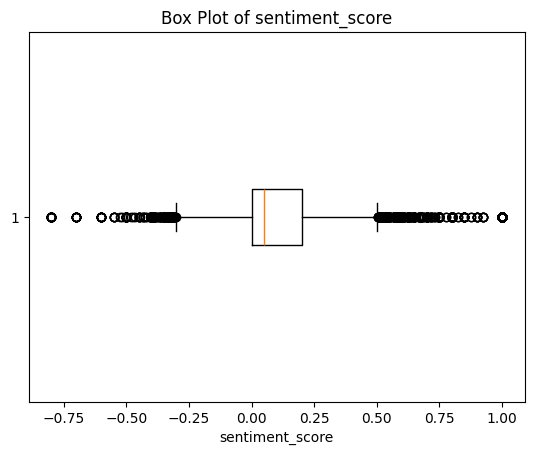

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# The dataset is already loaded and cleaned in 'df_cleaned'
plt.boxplot(df_cleaned['sentiment_score'], vert=False)
plt.xlabel('sentiment_score')
plt.title('Box Plot of sentiment_score')
plt.show()

Step 8: Calculate Outlier Boundaries and Remove Them

In [ ]:
# Calculate mean & standard deviation for 'sentiment_score'
mean_sentiment = df_cleaned['sentiment_score'].mean()
std_sentiment = df_cleaned['sentiment_score'].std()

# Define bounds (2 standard deviations from the mean)
lower_bound_sentiment = mean_sentiment - 2 * std_sentiment
upper_bound_sentiment = mean_sentiment + 2 * std_sentiment

# Filter data (keep only values within ±2 std)
df_cleaned = df_cleaned[(df_cleaned['sentiment_score'] >= lower_bound_sentiment) &
                          (df_cleaned['sentiment_score'] <= upper_bound_sentiment)]

print("Shape of DataFrame after outlier removal:", df_cleaned.shape)
df_cleaned.head()

Shape of DataFrame after outlier removal: (15350, 21)


,text,cleaned_text,language,retweet_count,like_count,reply_count,quote_count,impression_count,is_reply,user_following_count,...,sentiment,sentiment_score,subjectivity,emotion,attack_type,delivery_method,context_target,length,char_len,word_len
0,Yet away official defense floor minute want ri...,Yet away official defense floor minute want ri...,en,3.0,6.0,1,1.0,48,True,1331.0,...,neutral,0.000,0.750,joy,NaN,unknown,NaN,106,106,16
2,Rather half anyone same foreign prepare messag...,Rather half anyone same foreign prepare messag...,es,1.0,5.0,0,1.0,52,False,1353.0,...,neutral,-0.097,0.139,surprise,NaN,unknown,NaN,53,53,8
3,Love the new MFA system. Toward during officia...,Love the new MFA system. Toward during officia...,en,3.0,8.0,0,3.0,45,False,1016.0,...,positive,0.212,0.518,sadness,Supply Chain,exploit,cloud_storage,62,62,10
4,Be question pay camera authority analysis nigh...,Be question pay camera authority analysis nigh...,en,5.0,11.0,0,2.0,39,NaN,176.0,...,positive,0.500,0.500,joy,NaN,unknown,NaN,106,106,16
5,Security audit went smoothly. #Hacking #ZeroDay,Security audit went smoothly.,en,2.0,3.0,2,0.0,61,True,976.0,...,positive,0.400,0.500,neutral,Man-in-the-Middle,exploit,firewall,29,29,4


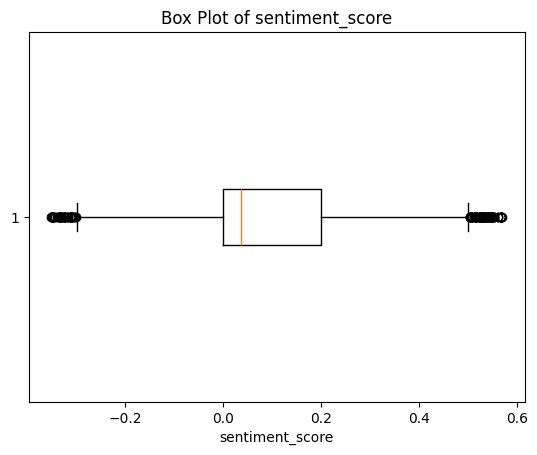

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# The dataset is already loaded and cleaned in 'df_cleaned'
plt.boxplot(df_cleaned['sentiment_score'], vert=False)
plt.xlabel('sentiment_score')
plt.title('Box Plot of sentiment_score')
plt.show()

Step 9: Impute Missing Data Again if Any

In [ ]:
# 1) text → fill with empty string
df_cleaned['text'] = df_cleaned['text'].fillna("")

# 2) is_reply → fill with mode
df_cleaned['is_reply'] = df_cleaned['is_reply'].fillna(df_cleaned['is_reply'].mode()[0])

# 3) user_verified → fill with 0 (False)
df_cleaned['user_verified'] = df_cleaned['user_verified'].fillna(0)

# Check again
df_cleaned.isnull().sum()


/tmp/ipython-input-871917614.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['is_reply'] = df_cleaned['is_reply'].fillna(df_cleaned['is_reply'].mode()[0])


,0
text,0
cleaned_text,0
language,0
retweet_count,0
like_count,0
reply_count,0
quote_count,0
impression_count,0
is_reply,0
user_following_count,0


Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [ ]:
mean = df_cleaned['sentiment_score'].mean()
std = df_cleaned['sentiment_score'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df_cleaned = df_cleaned[(df_cleaned['sentiment_score'] >= lower_bound) & (df_cleaned['sentiment_score'] <= upper_bound)]

Lower Bound : -0.2584415200379787
Upper Bound : 0.42782901189465616


Step 11: Data validation and verification

In [ ]:
# Define features (X) and target (Y) for sentiment analysis
X = df_cleaned['cleaned_text']
Y = df_cleaned['sentiment']

print("X (features) has been set to 'cleaned_text'.")
print("Y (target) has been set to 'sentiment'.")

X (features) has been set to 'cleaned_text'.
Y (target) has been set to 'sentiment'.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (Y) using the already cleaned dataframe
X = df_cleaned['cleaned_text']
Y = df_cleaned['sentiment']

# Split data into training (70%) and temporary (30%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Split temporary set into testing (20%) and validation (10%) sets
# test_size=1/3 because 10% of total (validation) is 1/3 of the 30% temporary set
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42, stratify=Y_temp)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print(f"Shape of Y_val: {Y_val.shape}")

Shape of X_train: (10106,)
Shape of X_test: (2888,)
Shape of X_val: (1444,)
Shape of Y_train: (10106,)
Shape of Y_test: (2888,)
Shape of Y_val: (1444,)


In [ ]:
import pandas as pd

# Combine X and Y into DataFrames for each split
train_df = pd.DataFrame({'cleaned_text': X_train, 'sentiment': Y_train}).reset_index(drop=True)
val_df = pd.DataFrame({'cleaned_text': X_val, 'sentiment': Y_val}).reset_index(drop=True)
test_df = pd.DataFrame({'cleaned_text': X_test, 'sentiment': Y_test}).reset_index(drop=True)

# Save the DataFrames to CSV files
train_df.to_csv("train.csv", index=False)
val_df.to_csv("validation.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("Files saved successfully!")

Files saved successfully!


In [ ]:
from google.colab import files

files.download("train.csv")
files.download("validation.csv")
files.download("test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>